# Reconocimiento de dígitos manuscritos

## Dibujar número a reconocer

In [1]:
from pygame import *
from random import *

ANCHO = 400
ALTO = 400
White =  (255,255,255)

class Bloque(sprite.Sprite):
    def __init__(self, color, ancho, alto):
        sprite.Sprite.__init__(self)
        self.image = Surface([ancho, alto])
        self.image.fill(color)
        self.rect = self.image.get_rect()

if __name__ == '__main__':
    init()
    pantalla = display.set_mode([ANCHO,ALTO])
    display.set_caption('Paint')
    todos = sprite.Group()          #Siempre se debe hacer un grupo con todos los sprie a mostrar
    mouse.set_visible(True)
    fin = False
    while not fin:
        pos = mouse.get_pos()
        for evento in event.get():
            if evento.type == QUIT:
            	image.save(pantalla, "foto.jpg")
            	fin = True
        if mouse.get_pressed()==(1,0,0):
        	jugador = Bloque(White, 40, 40)
        	todos.add(jugador)
        	jugador.rect.x = pos[0]
        	jugador.rect.y = pos[1]
        
        todos.draw(pantalla)
        display.flip()


pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


### Importar librerías

In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

Using TensorFlow backend.


In [3]:
seed = 7
numpy.random.seed(seed)

## Cargar datos

In [4]:
# Base de datos MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Cargar imagen dibujada anteriormente
img = io.imread('foto.jpg', as_gray=True)
img = resize(img, (28,28), mode='reflect', anti_aliasing=True)

### Visualizar datos cargados

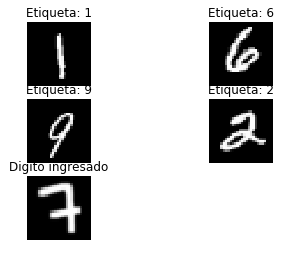

In [5]:
plt.subplot(321)
plt.title('Etiqueta: {}'.format(y_train[8]))
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))
plt.axis('off')

plt.subplot(322)
plt.title('Etiqueta: {}'.format(y_train[13]))
plt.imshow(X_train[13], cmap=plt.get_cmap('gray'))
plt.axis('off')

plt.subplot(323)
plt.title('Etiqueta: {}'.format(y_train[22]))
plt.imshow(X_train[22], cmap=plt.get_cmap('gray'))
plt.axis('off')

plt.subplot(324)
plt.title('Etiqueta: {}'.format(y_train[5]))
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.axis('off')

plt.subplot(325)
plt.title('Digito ingresado')
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')
# muestra el plot
plt.show()

## Redimensionar tensor


<img src="tensor.jpg" width="600" height="83"/>

In [6]:
#num_pixels = 28 * 28
num_pixels = X_train.shape[1] * X_train.shape[2]

#Redimensionar array a 6000 x 784 (Estirar imagen a una sola fila)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
#Redimensionar 10000 imagenes de 28 x 28 (Vector de pixeles)
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
img = img.reshape(1, num_pixels).astype('float32')

### Normalizar pixeles

In [7]:
X_train = X_train / 255
X_test = X_test / 255

## One-hot encoding

<img src="onehot.png" width="500" height="500" />

### Antes

In [8]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


## Codificación

In [9]:
# Convertir categorias a una matriz de clasificacion binaria (es un 3?: 1 si o 0 no)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

### Después 

In [10]:
# Después del one-hot encoding
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Creación del modelo

```model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
```
                
<img src="http://keras.dhpit.com/img/nn.png" width="400" height="400" />

In [11]:
def baseline_model():
    # Crea el modelo de tipo secuencial ("Una capa delante de la otra")
    model = Sequential()
    # Añadir capa de entrada 784 datos y 784 neuronas en la primera capa
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    # Capa de salida
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compila el modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Construir del modelo
model = baseline_model()

## Entrenamiento y evaluación

In [12]:
# Entrenar el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=500, verbose=2)

# Evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.3723 - acc: 0.8963 - val_loss: 0.1891 - val_acc: 0.9444
Epoch 2/10
 - 4s - loss: 0.1546 - acc: 0.9567 - val_loss: 0.1310 - val_acc: 0.9624
Epoch 3/10
 - 4s - loss: 0.1067 - acc: 0.9695 - val_loss: 0.0981 - val_acc: 0.9700
Epoch 4/10
 - 5s - loss: 0.0802 - acc: 0.9774 - val_loss: 0.0906 - val_acc: 0.9736
Epoch 5/10
 - 5s - loss: 0.0615 - acc: 0.9830 - val_loss: 0.0746 - val_acc: 0.9777
Epoch 6/10
 - 5s - loss: 0.0471 - acc: 0.9874 - val_loss: 0.0688 - val_acc: 0.9792
Epoch 7/10
 - 4s - loss: 0.0379 - acc: 0.9901 - val_loss: 0.0694 - val_acc: 0.9780
Epoch 8/10
 - 4s - loss: 0.0304 - acc: 0.9924 - val_loss: 0.0626 - val_acc: 0.9811
Epoch 9/10
 - 4s - loss: 0.0240 - acc: 0.9945 - val_loss: 0.0622 - val_acc: 0.9802
Epoch 10/10
 - 4s - loss: 0.0197 - acc: 0.9962 - val_loss: 0.0590 - val_acc: 0.9808
[0.05898521497973706, 0.9808]
Baseline Error: 1.92%


## Predicción del dígito dibujado

In [13]:
y_predict = model.predict_classes([img], verbose=0)
print(y_predict)

[3]


http://projector.tensorflow.org/

# CNN

In [ ]:
import numpy
from skimage import io
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# ajusta el orden
from keras import backend as K
K.set_image_dim_ordering('th')

In [ ]:
seed = 7
numpy.random.seed(seed)

In [ ]:
# cargamos los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img = io.imread('foto.jpg', as_gray=True)
img = resize(img, (28,28), mode='reflect', anti_aliasing=True)

In [ ]:
# reformas para [ejemplo][canales][ancho][alto]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

img = img.reshape(1,1,28,28).astype('float16')

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# One hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
def baseline_model():
    # Crea el modelo
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile el modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# construimos el modelo
model = baseline_model()
# entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=500)
# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
y_predict = model.predict_classes([img], verbose=0)
print(y_predict)